<a href="https://colab.research.google.com/github/sagarpatiler/machine_learning/blob/main/clustering_mall_customers_pyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 15.0 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 16.9 MB 69.6 MB/s 
     |████████████████████████████████| 10.4 MB 73.9 MB/s 
     |████████████████████████████████| 25.9 MB 20.4 MB/s 
     |████████████████████████████████| 2.0 MB 9.1 MB/s 
     |████████████████████████████████| 636 kB 64.6 MB/s 
     |████████████████████████████████| 3.3 MB 35.2 MB/s 
     |████████████████████████████████| 88 kB 4.4 MB/s 
     |████████████████████████████████| 1.3 MB 41.3 MB/s 
     |████████████████████████████████| 6.8 MB 55.8 MB/s 
     |████████████████████████████████| 137 kB 73.0 MB/s 
     |████████████████████████████████| 1.7 MB 54.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing whee

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
df=data.sample(frac=0.95,random_state=40)
df_unseen=data.drop(df.index)

In [ ]:
df.shape

(190, 5)

In [ ]:
df_unseen

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
7,8,Female,23,18,94
12,13,Female,58,20,15
19,20,Female,35,23,98
50,51,Female,49,42,52
70,71,Male,70,49,55
71,72,Female,47,49,42
114,115,Female,18,65,48
165,166,Female,36,85,75
184,185,Female,41,99,39
193,194,Female,38,113,91


In [ ]:
df.index

Int64Index([ 96,   5, 116,  35, 183, 160,  54, 134,  90, 191,
            ...
            180,   8, 185, 181,  49,  73,  91,  55,  74, 159],
           dtype='int64', length=190)

In [ ]:
df.reset_index(drop=True,inplace=True)
df_unseen.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,97,Female,47,60,47
1,6,Female,22,17,76
2,117,Female,63,65,43
3,36,Female,21,33,81
4,184,Female,29,98,88


In [ ]:
from pycaret.clustering import *
exp=setup(df,
          normalize=True,
          ignore_features=['CustomerID'])

,Description,Value
0,session_id,6134
1,Original Data,"(190, 5)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(190, 5)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['CustomerID'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_nu...
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
              

In [ ]:
pycaret.clustering.models()

INFO:logs:gpu_param set to False


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
kmeans=create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3169,80.8057,1.1757,0,0,0


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6134, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
kmean_results=assign_model(kmeans)
kmean_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6134, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(190, 6)
INFO:logs:assign_model() succesfully completed......................................


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,97,Female,47,60,47,Cluster 0
1,6,Female,22,17,76,Cluster 1
2,117,Female,63,65,43,Cluster 0
3,36,Female,21,33,81,Cluster 1
4,184,Female,29,98,88,Cluster 3


In [ ]:
kmean_results[kmean_results['Cluster']=='Cluster 0']

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,97,Female,47,60,47,Cluster 0
2,117,Female,63,65,43,Cluster 0
5,161,Female,56,79,35,Cluster 0
6,55,Female,50,43,45,Cluster 0
8,91,Female,68,59,55,Cluster 0
13,27,Female,45,28,32,Cluster 0
14,90,Female,50,58,46,Cluster 0
21,29,Female,40,29,31,Cluster 0
22,86,Male,48,54,46,Cluster 0
23,94,Female,40,60,40,Cluster 0


In [ ]:
plot_model(kmeans)


INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


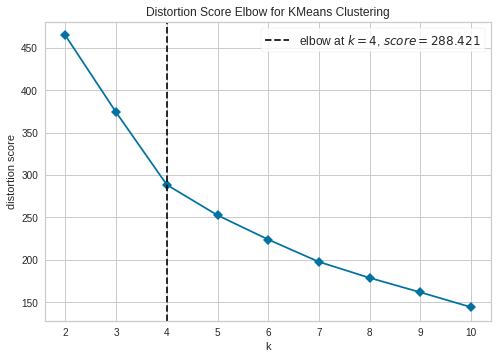

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(kmeans,plot='elbow')

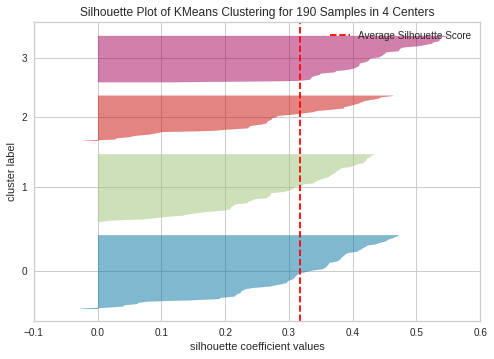

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(kmeans,plot='silhouette')

In [ ]:
plot_model(kmeans,plot='distribution')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
unseen_pre=predict_model(kmeans,data=df_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6134, tol=0.0001, verbose=0), ml_usecase=MLUsecase.CLUSTERING)


In [ ]:
unseen_pre.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,8,Female,23,18,94,Cluster 1
1,13,Female,58,20,15,Cluster 0
2,20,Female,35,23,98,Cluster 1
3,51,Female,49,42,52,Cluster 0
4,71,Male,70,49,55,Cluster 0
